# Unit 5 - Financial Planning

In [1]:
# Initial imports
import os
import requests
import pandas as pd
from dotenv import load_dotenv
import alpaca_trade_api as tradeapi
from MCForecastTools import MCSimulation

%matplotlib inline

In [2]:
# Load .env enviroment variables
load_dotenv()

True

## Part 1 - Personal Finance Planner

### Collect Crypto Prices Using the `requests` Library

In [3]:
# Set current amount of crypto assets
# my_btc and my_eth. Set them equal to 1.2 and 5.3, respectively.
# I am using assignment #5.2 as my example.

my_btc = 1.2
my_eth = 5.3


In [4]:
# Crypto API URLs
btc_url = "https://api.alternative.me/v2/ticker/Bitcoin/?convert=CAD"
eth_url = "https://api.alternative.me/v2/ticker/Ethereum/?convert=CAD"

In [5]:
# Fetch current BTC price
btc_response = requests.get(btc_url).json()
btc_price = btc_response["data"]["1"]["quotes"]["CAD"]["price"]

# Compute current value of my crpto
my_btc_value = my_btc*btc_price

# Print current crypto wallet balance
print(f"The current value of your {my_btc} BTC is ${my_btc_value:0.2f}")


The current value of your 1.2 BTC is $58325.68


In [6]:
# Fetch current ETH price
eth_response_data = requests.get(eth_url).json()
eth_price = eth_response_data["data"]["1027"]["quotes"]["USD"]["price"]

eth_price
                                                       
# Compute current value of my crpto
my_eth_value = my_eth*eth_price
                                                       
print(f"The current value of your {my_eth} ETH is ${my_eth_value:0.2f}")                                                       
                                                                                                              
                                                       
#my_eth = float(df_portfolio["ETH"]["close"]) 
#print(f"The current value of your {my_eth} ETH is ${my_eth_value:0.2f}")

The current value of your 5.3 ETH is $14223.72


### Collect Investments Data Using Alpaca: `SPY` (stocks) and `AGG` (bonds)

In [7]:
# Set current amount of shares
my_agg = 200
my_spy = 50

In [8]:
# Set Alpaca API key and secret
alpaca_api_key = os.getenv("ALPACA_API_KEY")
alpaca_secret_key = os.getenv("ALPACA_SECRET_KEY")

print(f"Alpaca Key type: {type(alpaca_api_key)}")
print(f"Alpaca Secret Key type: {type(alpaca_secret_key)}")

# Create the Alpaca API object
alpaca = tradeapi.REST(
    alpaca_api_key,
    alpaca_secret_key,
    api_version="v2")

Alpaca Key type: <class 'str'>
Alpaca Secret Key type: <class 'str'>


In [9]:
# Format current date as ISO format
today = pd.Timestamp("2022-01-19", tz="America/New_York").isoformat()

# Set the tickers
tickers = ["AGG", "SPY"]

# Set timeframe to '1D' for Alpaca API
timeframe = "1D"

# Get current closing prices for SPY and AGG
# (use a limit=1000 parameter to call the most recent 1000 days of data)
df_portfolio = alpaca.get_barset(
    tickers,
    timeframe,
    start = today,
    end = today
).df

# Preview DataFrame
df_portfolio

AGG                                      SPY  \
                            open    high     low   close   volume    open   
time                                                                        
2022-01-19 00:00:00-05:00  111.7  111.89  111.65  111.71  7641972  458.17   

                                                               
                               high     low   close    volume  
time                                                           
2022-01-19 00:00:00-05:00  459.6124  451.46  451.79  95311817

In [10]:
# Pick AGG and SPY close prices
# Format current date as ISO format
today = pd.Timestamp("2022-01-20", tz="America/New_York").isoformat()

tickers = ["AGG", "SPY"]

# Set timeframe to one day ('1D') for the Alpaca API
timeframe = "1D"



# Get current price data for AGG and SPY
df_portfolio = alpaca.get_barset(
    tickers,
    timeframe,
    start = today,
    end = today
).df

# Display sample data
df_portfolio

agg_close_price = float(df_portfolio["AGG"]["close"])
spy_close_price = float(df_portfolio["SPY"]["close"])

# Print AGG and SPY close prices
print(f"Current AGG closing price: ${agg_close_price}")
print(f"Current SPY closing price: ${spy_close_price}")

Current AGG closing price: $111.79
Current SPY closing price: $446.79


In [11]:
#Current Value of Stock df_portfolio
agg_value = agg_close_price * my_agg
spy_value = spy_close_price * my_spy

print(agg_value)
print(spy_value)


22358.0
22339.5


In [12]:
# Print current value of shares
print(f"The current value of your {my_spy} SPY shares is ${spy_value:0.2f}")
print(f"The current value of your {my_agg} AGG shares is ${agg_value:0.2f}")


The current value of your 50 SPY shares is $22339.50
The current value of your 200 AGG shares is $22358.00


In [28]:
#Total Values Stock:
total_stock_value = agg_value + spy_value  
total_stock_value

print(total_stock_value)

print(f"Total Value of Stock Shares ${total_stock_value}")

44697.5
Total Value of Stock Shares $44697.5


In [33]:
#Total Values of Crypto
total_crypto_value =my_btc_value + my_eth_value
total_crypto_value

print(f"Total Value of Crypto Holdings:{total_crypto_value}")

Total Value of Crypto Holdings:72549.39176


### Savings Health Analysis

In [34]:
# Set monthly household income
monthly_income = 12000
print(monthly_income)


12000


In [35]:
# Consolidate financial assets data
df_savings_data = [total_stock_value, total_crypto_value]

# Create savings DataFrame
df_savings = pd.DataFrame(df_savings_data, columns=["Amount"], index = ["Crypto", "Shares"])

# Display savings DataFrame
display(df_savings)

,Amount
Crypto,44697.50000
Shares,72549.39176


<AxesSubplot:title={'center':'Personal Savings'}, ylabel='Amount'>

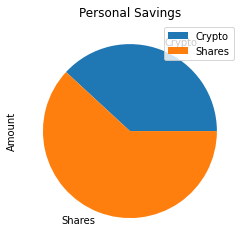

In [36]:
# Plot savings pie chart
df_savings.plot.pie(y="Amount", title="Personal Savings")

In [37]:
#df_value.plot.bar(title="Current Value in Dollars of Stock Portfolio")

In [38]:
# Set ideal emergency fund
emergency_fund = monthly_income * 3

# Calculate total amount of savings
total_savings = float(df_savings.sum())

# Validate saving health
if total_savings > emergency_fund:
    print(f"You have enough saved!")
elif total_savings == emergency_fund -total_savings:
    print(f'You have reached your goal!')
else:
    print(f"You are {emergency_fund - total_savings} short of you goal and get cracking!")



You have enough saved!


## Part 2 - Retirement Planning

### Monte Carlo Simulation

In [39]:
# Set Alpaca API key and secret
alpaca_api_key = os.getenv("ALPACA_API_KEY")
alpaca_secret_key = os.getenv("ALPACA_SECRET_KEY")

print(f"Alpaca Key type: {type(alpaca_api_key)}")
print(f"Alpaca Secret Key type: {type(alpaca_secret_key)}")

# Create the Alpaca API object
alpaca = tradeapi.REST(
    alpaca_api_key,
    alpaca_secret_key,
    api_version="v2")

Alpaca Key type: <class 'str'>
Alpaca Secret Key type: <class 'str'>


In [40]:
# Set start and end dates of five years back from today.
# Sample results may vary from the solution based on the time frame chosen
start = pd.Timestamp('2017-01-19', tz='America/New_York').isoformat()
end_date = pd.Timestamp('2022-01-19', tz='America/New_York').isoformat()


In [41]:
# Get 5 years' worth of historical data for SPY and AGG
# (use a limit=1000 parameter to call the most recent 1000 days of data)
# Set the ticker AGG
ticker = "AGG"

In [42]:
# Set timeframe to '1D'
timeframe = "1D"

# Set start and end datetimes of 5 years from Today
start_date = pd.Timestamp("2017-01-19", tz="America/New_York").isoformat()
end_date = pd.Timestamp("2022-01-19", tz="America/New_York").isoformat()

# Get 1 year's worth of historical data for AGG
ticker_data = alpaca.get_barset(
    ticker,
    timeframe,
    start = start_date,
    end = end_date,
    limit = 1000,
).df

ticker_data.head()

# Display sample data



## Set the ticker SPY
ticker = "SPY"

# Set timeframe to '1D'
timeframe = "1D"

# Set start and end datetimes of 4 years from Today
start_date = pd.Timestamp("2017-01-19", tz="America/New_York").isoformat()
end_date = pd.Timestamp("2022-01-19", tz="America/New_York").isoformat()

# Get 1 year's worth of historical data for SPY
ticker_data = alpaca.get_barset(
    ticker,
    timeframe,
    start=start_date,
    end=end_date,
    limit=1000,
).df

ticker_data.head()

SPY                                   
                             open    high     low   close     volume
time                                                                
2018-01-31 00:00:00-05:00  282.73  283.30  280.68  281.91   76360186
2018-02-01 00:00:00-05:00  281.04  283.06  280.68  281.60   64693558
2018-02-02 00:00:00-05:00  280.08  280.23  275.41  275.52  121717871
2018-02-05 00:00:00-05:00  273.47  275.85  263.31  264.18  205971586
2018-02-06 00:00:00-05:00  259.99  269.70  254.12  269.18  232359323

In [43]:
# Configuring a Monte Carlo simulation to forecast 30 years cumulative returns
# Set number of simulations all
num_sims = 500

# Configure a Monte Carlo simulation to forecast 30 YEARS OF returns
MC_AAG = MCSimulation(
    portfolio_data = ticker_data,
    num_simulation = num_sims,
    num_trading_days = 252*30
)


# Set number of simulations SPY
num_sims = 500

# Configure a Monte Carlo simulation to forecast 30 YEARS OF returns
MC_SPY = MCSimulation(
    portfolio_data = ticker_data,
    num_simulation = num_sims,
    num_trading_days = 252*30
)

#See Below
#MC_even_dist = MCSimulation(
#    portfolio_data = monte_carlo_df,
#    weights = [.40, .60],
#    num_simulation = 1000,
#    num_trading_days = 252*30)
#MC_even_dist.portfolio_data.head()

In [44]:
# Printing the simulation input data
MC_AAG.calc_cumulative_return()
MC_SPY.calc_cumulative_return()

Running Monte Carlo simulation number 0.
Running Monte Carlo simulation number 10.
Running Monte Carlo simulation number 20.
Running Monte Carlo simulation number 30.
Running Monte Carlo simulation number 40.
Running Monte Carlo simulation number 50.
Running Monte Carlo simulation number 60.
Running Monte Carlo simulation number 70.
Running Monte Carlo simulation number 80.
Running Monte Carlo simulation number 90.
Running Monte Carlo simulation number 100.


C:\Users\13212\Desktop\Fintech\uofm-virt-fin-pt-12-2021-u-c\02-Homework\05-APIs\Instructions\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead.  To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()


Running Monte Carlo simulation number 110.
Running Monte Carlo simulation number 120.
Running Monte Carlo simulation number 130.
Running Monte Carlo simulation number 140.
Running Monte Carlo simulation number 150.
Running Monte Carlo simulation number 160.
Running Monte Carlo simulation number 170.
Running Monte Carlo simulation number 180.
Running Monte Carlo simulation number 190.
Running Monte Carlo simulation number 200.
Running Monte Carlo simulation number 210.
Running Monte Carlo simulation number 220.
Running Monte Carlo simulation number 230.
Running Monte Carlo simulation number 240.
Running Monte Carlo simulation number 250.
Running Monte Carlo simulation number 260.
Running Monte Carlo simulation number 270.
Running Monte Carlo simulation number 280.
Running Monte Carlo simulation number 290.
Running Monte Carlo simulation number 300.
Running Monte Carlo simulation number 310.
Running Monte Carlo simulation number 320.
Running Monte Carlo simulation number 330.
Running Mon

,0,1,2,3,4,5,6,7,8,9,...,490,491,492,493,494,495,496,497,498,499
0,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
1,1.010225,0.993426,1.038965,1.009868,0.991002,0.997601,1.002544,0.985634,0.983336,1.019257,...,1.009684,0.986494,0.988840,1.010262,1.010360,0.999620,1.005208,1.009278,1.011432,0.994312
2,1.019897,1.006592,1.030746,1.009302,0.991867,1.006215,1.012494,1.002902,0.984081,1.023063,...,1.013891,0.983922,0.989360,1.013365,1.010332,1.015531,1.023357,1.005394,1.045064,1.007751
3,1.010835,1.004347,1.040530,1.021419,1.000662,1.003463,1.008218,0.990401,0.987853,1.017493,...,1.015688,0.946572,0.994629,0.999402,0.999508,0.991580,1.027042,1.028871,1.041611,1.024425
4,1.033454,1.022731,1.030639,1.010064,0.995052,1.026693,1.002925,0.986033,1.002691,1.040141,...,1.015912,0.925829,1.001244,0.992099,1.007425,0.989693,1.031791,1.021963,1.028226,1.021966
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7556,10.584748,49.741840,60.564299,16.234573,8.343986,16.563492,14.014263,24.403752,25.039694,97.748549,...,86.240569,39.029544,33.744715,81.364379,22.392403,86.858984,16.732636,195.430944,106.881978,30.233022
7557,10.597685,49.885263,60.999225,16.046175,8.248680,16.626886,13.763768,24.319977,25.328740,99.226879,...,86.463055,38.199666,33.973210,80.966716,22.397008,88.073506,16.660106,200.530123,104.337825,30.117174
7558,10.435638,49.106888,62.817099,16.006727,8.370808,16.715254,14.039557,24.264151,25.366351,99.015791,...,86.755363,37.469567,33.828039,80.921527,22.331964,88.085653,16.953377,199.014673,104.148229,30.340258
7559,10.391112,49.098026,63.959314,15.730477,8.358415,17.087864,14.023440,23.852950,25.305687,100.671112,...,86.211099,37.455350,33.750185,80.530637,22.627968,87.278064,17.081797,199.354960,106.258343,29.744897


In [45]:
# Running a Monte Carlo simulation to forecast 30 years cumulative returns
MC_AAG.calc_cumulative_return()
MC_SPY.calc_cumulative_return()

Running Monte Carlo simulation number 0.
Running Monte Carlo simulation number 10.
Running Monte Carlo simulation number 20.
Running Monte Carlo simulation number 30.
Running Monte Carlo simulation number 40.
Running Monte Carlo simulation number 50.
Running Monte Carlo simulation number 60.
Running Monte Carlo simulation number 70.
Running Monte Carlo simulation number 80.
Running Monte Carlo simulation number 90.
Running Monte Carlo simulation number 100.


C:\Users\13212\Desktop\Fintech\uofm-virt-fin-pt-12-2021-u-c\02-Homework\05-APIs\Instructions\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead.  To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()


Running Monte Carlo simulation number 110.
Running Monte Carlo simulation number 120.
Running Monte Carlo simulation number 130.
Running Monte Carlo simulation number 140.
Running Monte Carlo simulation number 150.
Running Monte Carlo simulation number 160.
Running Monte Carlo simulation number 170.
Running Monte Carlo simulation number 180.
Running Monte Carlo simulation number 190.
Running Monte Carlo simulation number 200.
Running Monte Carlo simulation number 210.
Running Monte Carlo simulation number 220.
Running Monte Carlo simulation number 230.
Running Monte Carlo simulation number 240.
Running Monte Carlo simulation number 250.
Running Monte Carlo simulation number 260.
Running Monte Carlo simulation number 270.
Running Monte Carlo simulation number 280.
Running Monte Carlo simulation number 290.
Running Monte Carlo simulation number 300.
Running Monte Carlo simulation number 310.
Running Monte Carlo simulation number 320.
Running Monte Carlo simulation number 330.
Running Mon

,0,1,2,3,4,5,6,7,8,9,...,490,491,492,493,494,495,496,497,498,499
0,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
1,1.001243,1.007338,0.995009,0.994948,1.006348,1.002215,1.005788,0.981722,0.999860,0.995418,...,0.987797,0.996809,1.017606,1.012445,0.997419,0.994539,0.988931,1.001043,1.008012,1.010759
2,1.004991,0.999700,0.985606,1.004870,1.032003,1.004110,1.040846,0.972594,1.013127,0.990265,...,0.992230,0.990262,1.011582,0.995955,1.005454,0.996821,0.970547,0.991744,0.998361,1.018947
3,1.019523,0.994453,0.993278,1.013607,1.036329,1.020595,1.040951,0.968069,1.038108,0.989692,...,0.976826,0.975001,1.014218,1.012117,1.026460,1.002270,0.986339,0.989928,0.990911,1.014945
4,1.018711,0.997394,0.987686,1.006059,1.027508,0.999568,1.050011,0.971368,1.035802,0.997677,...,0.976415,0.982347,1.032776,1.001521,0.998561,1.003954,0.978825,0.989735,0.986924,1.017569
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7556,13.813095,112.742660,226.584236,71.902861,46.301099,74.656522,50.721575,78.841331,12.872528,68.103077,...,4.492332,209.173942,50.631046,33.064478,3.487417,115.741994,174.305017,70.528950,6.795515,16.921156
7557,13.735428,110.442369,224.622325,73.139151,45.802613,75.747685,50.049504,78.965247,13.027822,68.300800,...,4.503094,210.180716,51.133679,32.653198,3.462709,115.554181,175.043451,70.981882,6.956445,17.025957
7558,13.686745,110.002572,220.098278,72.371513,46.035833,76.809253,49.812007,78.900007,12.964218,67.271161,...,4.583557,209.641025,50.711118,32.695422,3.475369,113.481612,175.682591,71.436496,6.943015,17.301982
7559,13.581246,111.239562,223.725620,72.605439,45.775692,76.900810,50.612430,78.798787,12.881349,68.210958,...,4.552432,206.224421,50.718436,32.564044,3.459733,114.893519,175.086706,72.709456,7.059377,17.392170


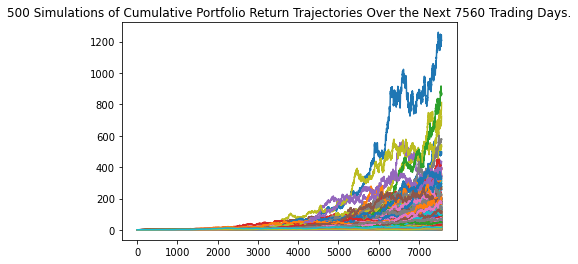

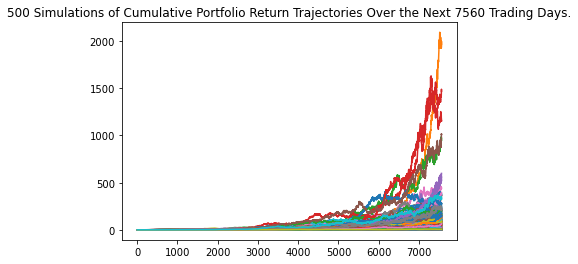

In [62]:
# Plot simulation outcomes
line_plot = MC_SPY.plot_simulation()
line_plot = MC_AAG.plot_simulation()

In [71]:
monte_carlo_df = alpaca.get_barset(
    tickers,
    timeframe,
    start = start,
    limit = 1000
).df


MC_even_dist = MCSimulation(
    portfolio_data = monte_carlo_df, 
    weights = [.40, .60],
    num_simulation = 1000,
    num_trading_days = 252*30)
MC_even_dist.portfolio_data.head()

AGG                                          \
                             open      high       low    close     volume   
time                                                                        
2018-02-06 00:00:00-05:00  107.46  107.5600  107.2800  107.300  5489931.0   
2018-02-07 00:00:00-05:00  107.43  107.4369  107.0000  107.085  3440626.0   
2018-02-08 00:00:00-05:00  106.84  107.1400  106.7700  106.920  4351275.0   
2018-02-09 00:00:00-05:00  106.78  107.0700  106.7000  106.760  5603974.0   
2018-02-12 00:00:00-05:00  106.74  106.9450  106.6632  106.770  5075086.0   

                                           SPY                          \
                          daily_return    open    high     low   close   
time                                                                     
2018-02-06 00:00:00-05:00          NaN     NaN     NaN     NaN     NaN   
2018-02-07 00:00:00-05:00    -0.002004  268.50  272.36  267.63  267.66   
2018-02-08 00:00:00-05:00    -0.001541  267.97  268.17  257.59  257.72   
2018-02-09 00:00:00-05:00    -0.001496  260.80  263.61  252.92  261.67   
2018-02-12 00:00:00-05:00     0.000094  263.87  267.01  261.88  265.26   

                                                     
                                volume daily_return  
time                                                 
2018-02-06 00:00:00-05:00          NaN          NaN  
2018-02-07 00:00:00-05:00  112819262.0          NaN  
2018-02-08 00:00:00-05:00  156654099.0    -0.037137  
2018-02-09 00:00:00-05:00  207357854.0     0.015327  
2018-02-12 00:00:00-05:00   99933794.0     0.013720

### Retirement Analysis

In [72]:
# Fetch summary statistics from the Monte Carlo simulation results
even_tbl = MC_even_dist.summarize_cumulative_return()

# Print summary statistics
print(even_tbl)

Running Monte Carlo simulation number 0.
Running Monte Carlo simulation number 10.
Running Monte Carlo simulation number 20.
Running Monte Carlo simulation number 30.
Running Monte Carlo simulation number 40.
Running Monte Carlo simulation number 50.
Running Monte Carlo simulation number 60.
Running Monte Carlo simulation number 70.
Running Monte Carlo simulation number 80.
Running Monte Carlo simulation number 90.
Running Monte Carlo simulation number 100.


C:\Users\13212\Desktop\Fintech\uofm-virt-fin-pt-12-2021-u-c\02-Homework\05-APIs\Instructions\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead.  To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()


Running Monte Carlo simulation number 110.
Running Monte Carlo simulation number 120.
Running Monte Carlo simulation number 130.
Running Monte Carlo simulation number 140.
Running Monte Carlo simulation number 150.
Running Monte Carlo simulation number 160.
Running Monte Carlo simulation number 170.
Running Monte Carlo simulation number 180.
Running Monte Carlo simulation number 190.
Running Monte Carlo simulation number 200.
Running Monte Carlo simulation number 210.
Running Monte Carlo simulation number 220.
Running Monte Carlo simulation number 230.
Running Monte Carlo simulation number 240.
Running Monte Carlo simulation number 250.
Running Monte Carlo simulation number 260.
Running Monte Carlo simulation number 270.
Running Monte Carlo simulation number 280.
Running Monte Carlo simulation number 290.
Running Monte Carlo simulation number 300.
Running Monte Carlo simulation number 310.
Running Monte Carlo simulation number 320.
Running Monte Carlo simulation number 330.
Running Mon

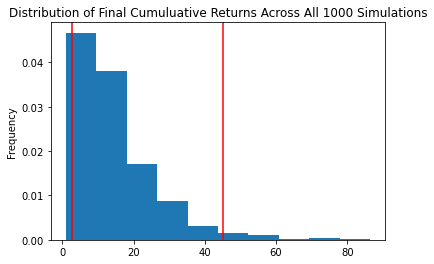

In [78]:
# Plot probability distribution and confidence intervals
dist_plot = MC_even_dist.plot_distribution()

# Save the plot for future usage
dist_plot.get_figure().savefig('MC_fiveyear_dist_plot.png',bbox_inches='tight')

#dist_plot = MC_even_dist.plot_distrubution()

### Calculate the expected portfolio return at the `95%` lower and upper confidence intervals based on a `$20,000` initial investment.

In [74]:
# Set initial investment
initial_investment = 20000

# Use the lower and upper `95%` confidence intervals to calculate the range of the possible outcomes of our $20,000
#confidence_interval = ci_lower
ci_lower = round(even_tbl[8]*initial_investment,2)
ci_upper = round(even_tbl[9]*initial_investment,2)

# Print results
print(f"There is a 95% chance that an initial investment of ${initial_investment} in the portfolio"
      f" over the next 30 years will end within in the range of"
      f" ${ci_lower} and ${ci_upper}")

There is a 95% chance that an initial investment of $20000 in the portfolio over the next 30 years will end within in the range of $52848.47 and $902696.86


### Calculate the expected portfolio return at the `95%` lower and upper confidence intervals based on a `50%` increase in the initial investment.

In [75]:
# Set initial investment
initial_investment = 20000 * 1.5

# Use the lower and upper `95%` confidence intervals to calculate the range of the possible outcomes of our $30,000
ci_lower = round(even_tbl[8]*initial_investment,2)
ci_upper = round(even_tbl[9]*initial_investment,2)

# Print results
print(f"There is a 95% chance that an initial investment of ${initial_investment} in the portfolio"
      f" over the next 30 years will end within in the range of"
      f" ${ci_lower} and ${ci_upper}")

There is a 95% chance that an initial investment of $30000.0 in the portfolio over the next 30 years will end within in the range of $79272.7 and $1354045.29


## Optional Challenge - Early Retirement


### Five Years Retirement Option

In [ ]:
# Configuring a Monte Carlo simulation to forecast 5 years cumulative returns
# YOUR CODE HERE!

In [ ]:
# Running a Monte Carlo simulation to forecast 5 years cumulative returns
# YOUR CODE HERE!

In [ ]:
# Plot simulation outcomes
# YOUR CODE HERE!

In [ ]:
# Plot probability distribution and confidence intervals
# YOUR CODE HERE!

In [ ]:
# Fetch summary statistics from the Monte Carlo simulation results
# YOUR CODE HERE!

# Print summary statistics
# YOUR CODE HERE!

In [ ]:
# Set initial investment
# YOUR CODE HERE!

# Use the lower and upper `95%` confidence intervals to calculate the range of the possible outcomes of our $60,000
# YOUR CODE HERE!

# Print results
print(f"There is a 95% chance that an initial investment of ${initial_investment} in the portfolio"
      f" over the next 5 years will end within in the range of"
      f" ${ci_lower_five} and ${ci_upper_five}")

### Ten Years Retirement Option

In [ ]:
# Configuring a Monte Carlo simulation to forecast 10 years cumulative returns
# YOUR CODE HERE!

In [ ]:
# Running a Monte Carlo simulation to forecast 10 years cumulative returns
# YOUR CODE HERE!

In [ ]:
# Plot simulation outcomes
# YOUR CODE HERE!

In [ ]:
# Plot probability distribution and confidence intervals
# YOUR CODE HERE!

In [ ]:
# Fetch summary statistics from the Monte Carlo simulation results
# YOUR CODE HERE!

# Print summary statistics
# YOUR CODE HERE!

In [ ]:
# Set initial investment
# YOUR CODE HERE!

# Use the lower and upper `95%` confidence intervals to calculate the range of the possible outcomes of our $60,000
# YOUR CODE HERE!

# Print results
print(f"There is a 95% chance that an initial investment of ${initial_investment} in the portfolio"
      f" over the next 10 years will end within in the range of"
      f" ${ci_lower_ten} and ${ci_upper_ten}")